In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#1) DATA CLEANING

In [6]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#changing the name of the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2650,ham,Do you like shaking your booty on the dance fl...
5099,ham,"Ah, well that confuses things, doesnt it? I th..."
1673,spam,Monthly password for wap. mobsi.com is 391784....
1937,ham,The fact that you're cleaning shows you know w...
137,ham,No no. I will check all rooms befor activities


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing valuss
df.isnull().sum()

,0
target,0
text,0


In [12]:
#checking duplicaties
df.duplicated().sum()

np.int64(403)

In [13]:
#drop duplicates
df = df.drop_duplicates(keep = 'first')

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

#2) EDA


In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

,count
target,
0,4516
1,653


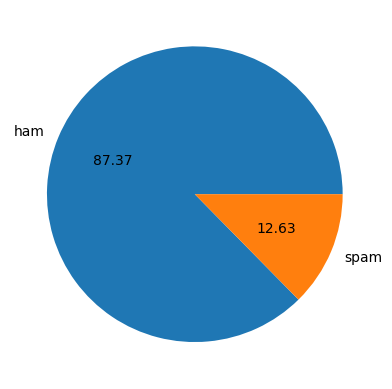

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
!pip install nltk

In [20]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
df['num_char'] = df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df["num_words"] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df["num_sentences"] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#for ham
df[df['target'] == 0 ][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#for spam
df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

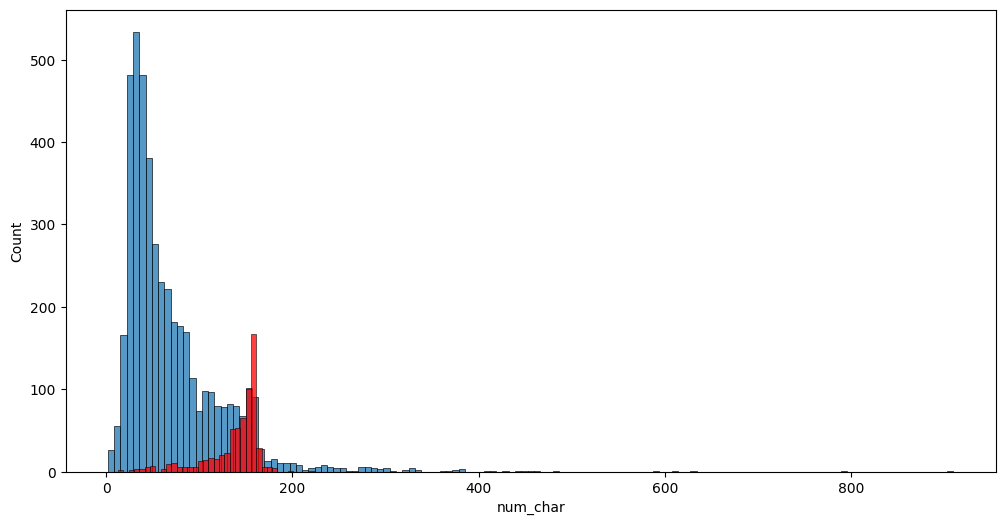

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

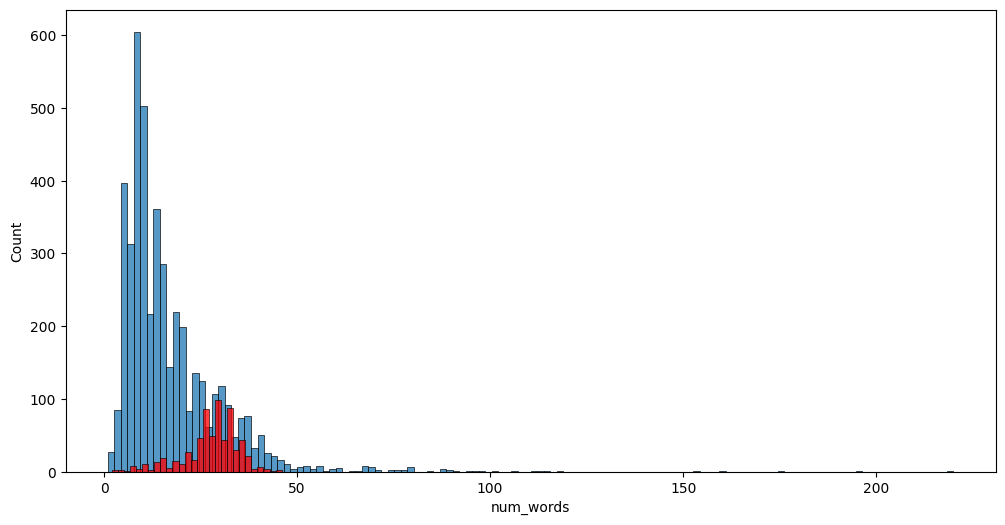

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


<Axes: xlabel='num_sentences', ylabel='Count'>

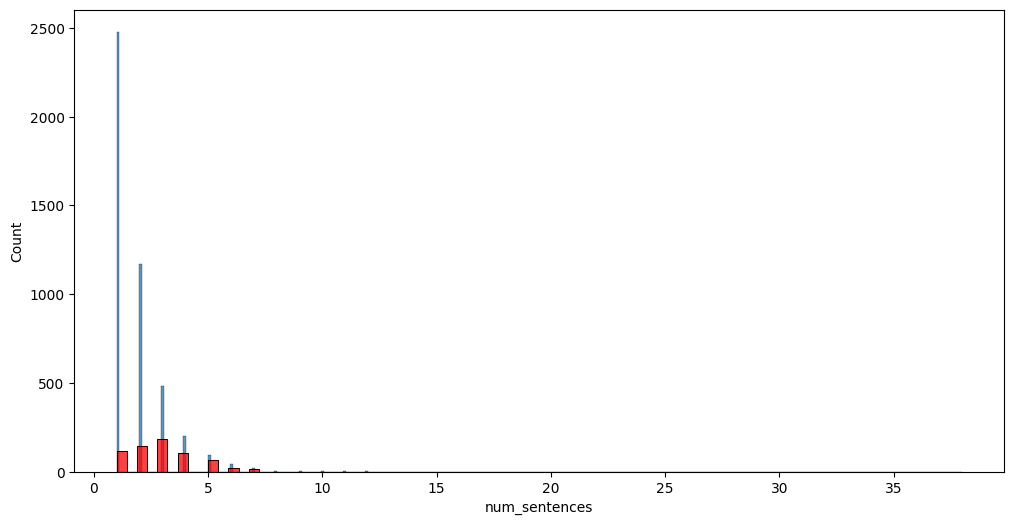

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

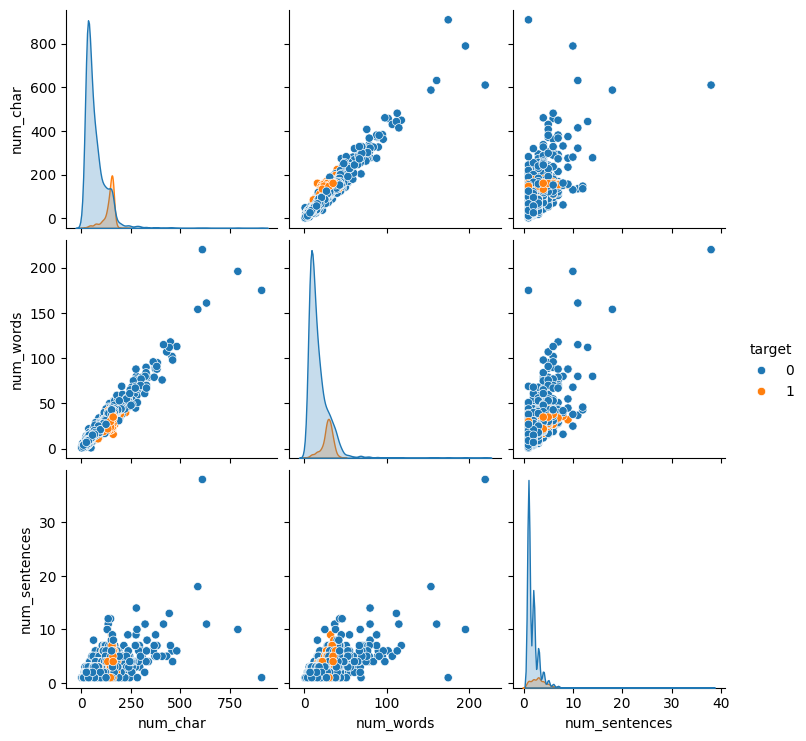

In [30]:
sns.pairplot(df,hue='target')

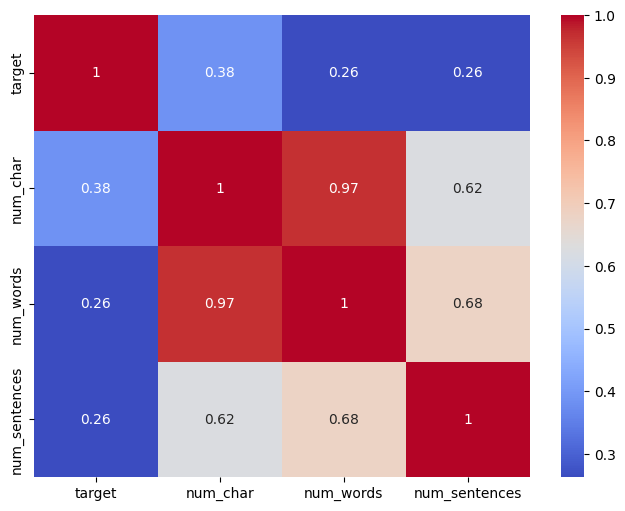

In [31]:
# Keep only numeric columns for correlation
numeric_df = df[['target', 'num_char', 'num_words', 'num_sentences']]

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


#3. Data Preprocessing

####Lower case
####Tokenization
####Removing special characters
####Removing stop words and punctuation
####Stemmings




In [32]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

# Download stopwords if not already
nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():   # keep only alphanumeric tokens
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))  # stemming

    return " ".join(y)


# Test
print(transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


gon na home soon want talk stuff anymor tonight k cri enough today


In [33]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [34]:
ps.stem('loving')

'love'

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

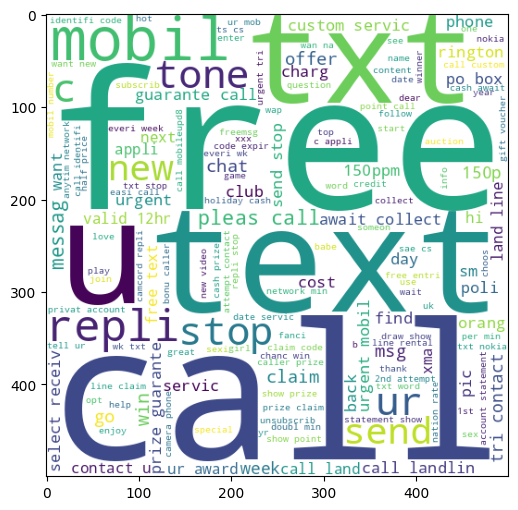

In [37]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

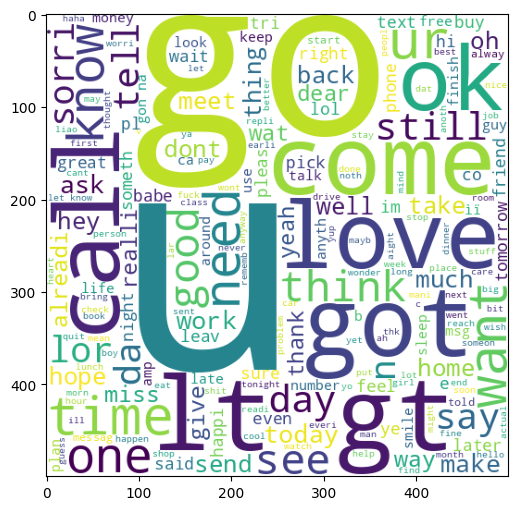

In [38]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)

9939

Text(0.5, 1.0, 'Top 30 Most Common Words in Spam')

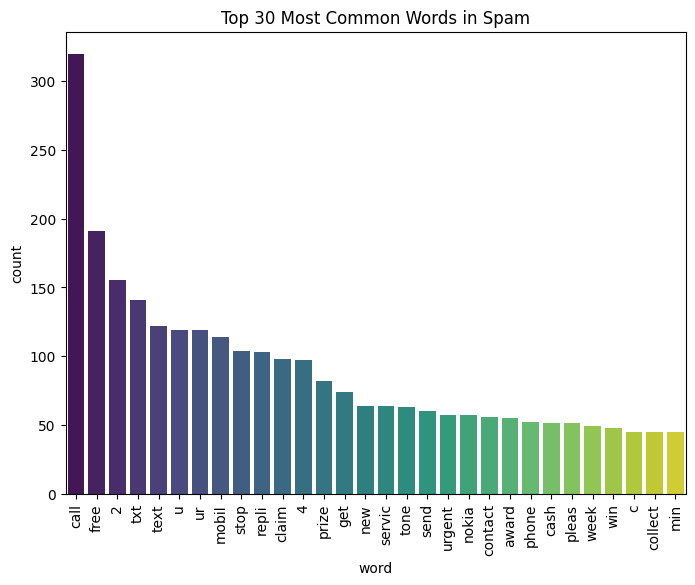

In [41]:
from collections import Counter
 #Convert counter into DataFrame
spam_common = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot with explicit x and y
plt.figure(figsize=(8,6))
sns.barplot(x="word", y="count", data=spam_common, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 30 Most Common Words in Spam")

In [42]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)

35404

Text(0.5, 1.0, 'Top 30 Most Common Words in ham')

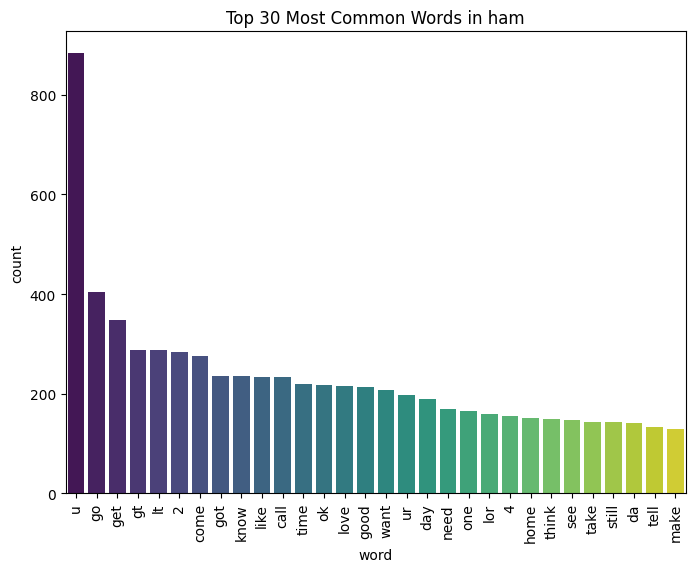

In [44]:
#Convert counter into DataFrame
ham_common = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot with explicit x and y
plt.figure(figsize=(8,6))
sns.barplot(x="word", y="count", data=ham_common, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 30 Most Common Words in ham")

#4) MODEL BUILDING

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
y = df['target'].values

In [48]:

X.shape


(5169, 3000)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [53]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [54]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [59]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9487179487179487


In [60]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.933269,0.841584


In [61]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.933269


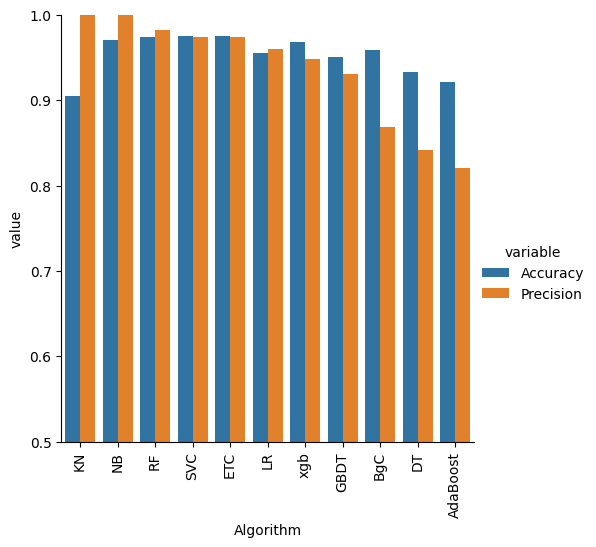

In [62]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#5) MODEL TUNING

In [63]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [64]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [65]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [66]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [67]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [68]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
6,xgb,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584


In [69]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [70]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [71]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [72]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [74]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [75]:
from sklearn.ensemble import StackingClassifier

In [76]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [77]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [78]:
mnb.fit(X_train, y_train)


MultinomialNB()

In [79]:
import pickle

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save trained model (MultinomialNB, not unfitted)
with open("final_model.pkl", "wb") as f:
    pickle.dump(mnb, f)


#STREAMLIT APP


In [80]:
# # app.py
# import streamlit as st
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# import string
# import pickle
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB

# # Download required nltk data

# nltk.download('punkt')
# nltk.download('punkt_tab')  # Fix for deployment error
# nltk.download('stopwords')

# # -----------------------------
# # Utility Functions
# # -----------------------------
# ps = PorterStemmer()

# def transform_text(text):
#     text = text.lower()
#     tokens = nltk.word_tokenize(text)
#     tokens = [i for i in tokens if i.isalnum()]
#     tokens = [i for i in tokens if i not in stopwords.words('english') and i not in string.punctuation]
#     tokens = [ps.stem(i) for i in tokens]
#     return " ".join(tokens)

# # -----------------------------
# # Caching for speed
# # -----------------------------
# @st.cache_data
# def load_data():
#     df = pd.read_csv("spam.csv", encoding="latin-1")
#     df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
#     df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
#     df.drop_duplicates(inplace=True)
#     df['target'] = df['target'].map({'ham':0,'spam':1})
#     df['transformed_text'] = df['text'].apply(transform_text)
#     df['num_char'] = df['text'].apply(len)
#     df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
#     df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
#     return df

# @st.cache_resource
# def load_model_vectorizer():
#     with open("vectorizer.pkl","rb") as f:
#         tfidf = pickle.load(f)
#     with open("final_model.pkl","rb") as f:
#         model = pickle.load(f)
#     return tfidf, model

# df = load_data()
# tfidf, model = load_model_vectorizer()

# # Precompute WordClouds
# spam_wc = WordCloud(width=300, height=200, background_color='white').generate(
#     df[df['target']==1]['transformed_text'].str.cat(sep=" ")
# )
# ham_wc = WordCloud(width=300, height=200, background_color='white').generate(
#     df[df['target']==0]['transformed_text'].str.cat(sep=" ")
# )

# # -----------------------------
# # Sidebar Navigation
# # -----------------------------
# st.sidebar.title("Navigation")
# page = st.sidebar.radio("Go to", ["Home","EDA","Model Performance","Prediction","Batch Prediction","Dashboard"])

# # -----------------------------
# # HOME PAGE
# # -----------------------------
# if page == "Home":
#     st.title("🔥 SMS Spam Detection Project 🔥")
#     st.subheader("About the Project")
#     st.markdown("""
#     This project detects whether an SMS message is **Spam** or **Ham** (not spam) using machine learning.
#     It leverages a **Naive Bayes** classifier trained on a dataset of SMS messages.

#     **Features of this App:**
#     - Explore SMS data through multiple charts.
#     - Compare different models' performance.
#     - Predict single SMS or batch of messages.
#     - Dashboard to visualize top words and message stats.
#     """)
#     st.subheader("How to Use the App")
#     st.markdown("""
#     1. Navigate through sidebar to explore different pages.
#     2. Use **EDA** page to understand the dataset.
#     3. **Model Performance** page shows accuracies and precision of ML models.
#     4. **Prediction** page: Enter SMS text to check if it is Spam or Ham.
#     5. **Batch Prediction**: Upload CSV to get predictions for multiple messages.
#     6. **Dashboard**: View top words, message length distributions, and more.
#     """)
#     st.markdown("---")
#     st.markdown("✅ **Made by Ismail Shah**")

# # -----------------------------
# # EDA PAGE
# # -----------------------------
# elif page == "EDA":
#     st.title("📊 Exploratory Data Analysis (EDA)")

#     st.subheader("Target Distribution")
#     fig1, ax1 = plt.subplots(figsize=(7,4))
#     ax1.pie(df['target'].value_counts(), labels=['Ham','Spam'], autopct="%0.2f%%", colors=['#5DADE2','#E74C3C'])
#     st.pyplot(fig1)

#     st.subheader("Message Lengths")
#     fig2, ax2 = plt.subplots(figsize=(7,4))
#     sns.histplot(df['num_char'], bins=30, kde=True, ax=ax2, color='green')
#     st.pyplot(fig2)

#     fig3, ax3 = plt.subplots(figsize=(7,4))
#     sns.histplot(df['num_words'], bins=30, kde=True, ax=ax3, color='orange')
#     st.pyplot(fig3)

#     fig4, ax4 = plt.subplots(figsize=(7,4))
#     sns.histplot(df['num_sentences'], bins=30, kde=True, ax=ax4, color='purple')
#     st.pyplot(fig4)

#     st.subheader("Correlation Heatmap")
#     fig5, ax5 = plt.subplots(figsize=(8,5))
#     sns.heatmap(df[['target','num_char','num_words','num_sentences']].corr(), annot=True, cmap="coolwarm", ax=ax5)
#     st.pyplot(fig5)

#     st.subheader("WordCloud for Spam")
#     fig6, ax6 = plt.subplots(figsize=(7,4))
#     ax6.imshow(spam_wc)
#     ax6.axis('off')
#     st.pyplot(fig6)

#     st.subheader("WordCloud for Ham")
#     fig7, ax7 = plt.subplots(figsize=(7,4))
#     ax7.imshow(ham_wc)
#     ax7.axis('off')
#     st.pyplot(fig7)

#     st.subheader("Top 20 Words in Spam")
#     spam_words = pd.Series(" ".join(df[df['target']==1]['transformed_text']).split()).value_counts().head(20)
#     fig8, ax8 = plt.subplots(figsize=(7,4))
#     sns.barplot(x=spam_words.values, y=spam_words.index, palette="Reds_r", ax=ax8)
#     st.pyplot(fig8)

#     st.subheader("Top 20 Words in Ham")
#     ham_words = pd.Series(" ".join(df[df['target']==0]['transformed_text']).split()).value_counts().head(20)
#     fig9, ax9 = plt.subplots(figsize=(7,4))
#     sns.barplot(x=ham_words.values, y=ham_words.index, palette="Blues_r", ax=ax9)
#     st.pyplot(fig9)

#     st.subheader("Message Length vs Target")
#     fig10, ax10 = plt.subplots(figsize=(7,4))
#     sns.boxplot(x='target', y='num_char', data=df, ax=ax10, palette=['#5DADE2','#E74C3C'])
#     ax10.set_xticklabels(['Ham','Spam'])
#     st.pyplot(fig10)

# # -----------------------------
# # MODEL PERFORMANCE PAGE
# # -----------------------------
# elif page == "Model Performance":
#     st.title("🤖 Model Performance")
#     X = tfidf.transform(df['transformed_text']).toarray()
#     y = df['target'].values
#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#     y_pred = model.predict(X_test)

#     st.subheader("Accuracy & Precision")
#     st.write("Accuracy:", accuracy_score(y_test,y_pred))
#     st.write("Precision:", precision_score(y_test,y_pred))

#     st.subheader("Confusion Matrix")
#     fig_cm, ax_cm = plt.subplots(figsize=(7,4))
#     sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', ax=ax_cm)
#     st.pyplot(fig_cm)

#     st.subheader("Prediction Distribution")
#     fig_dist, ax_dist = plt.subplots(figsize=(7,4))
#     sns.countplot(x=y_pred, palette=['#5DADE2','#E74C3C'], ax=ax_dist)
#     ax_dist.set_xticklabels(['Ham','Spam'])
#     st.pyplot(fig_dist)

# # -----------------------------
# # PREDICTION PAGE
# # -----------------------------
# elif page == "Prediction":
#     st.title("✉️ Single SMS Prediction")
#     user_input = st.text_area("Enter SMS Text")
#     if st.button("Predict"):
#         if user_input.strip() != "":
#             transformed = transform_text(user_input)
#             vector = tfidf.transform([transformed]).toarray()
#             pred = model.predict(vector)[0]
#             st.success("Prediction: **Spam**" if pred==1 else "Prediction: **Ham**")
#         else:
#             st.warning("Please enter a message.")

# # -----------------------------
# # BATCH PREDICTION PAGE
# # -----------------------------
# elif page == "Batch Prediction":
#     st.title("📑 Batch SMS Prediction")
#     file = st.file_uploader("Upload CSV", type=['csv'])
#     if file is not None:
#         batch_df = pd.read_csv(file)
#         if 'text' in batch_df.columns:
#             batch_df['transformed_text'] = batch_df['text'].apply(transform_text)
#             batch_vector = tfidf.transform(batch_df['transformed_text']).toarray()
#             batch_df['prediction'] = model.predict(batch_vector)
#             batch_df['prediction'] = batch_df['prediction'].map({0:'Ham',1:'Spam'})
#             st.dataframe(batch_df)
#         else:
#             st.error("CSV must have a column named 'text'")

# # -----------------------------
# # DASHBOARD PAGE
# # -----------------------------
# elif page == "Dashboard":
#     st.title("📊 Dashboard")

#     st.subheader("Top 10 Words in Spam")
#     spam_words = pd.Series(" ".join(df[df['target']==1]['transformed_text']).split()).value_counts().head(10)
#     fig1, ax1 = plt.subplots(figsize=(7,4))
#     sns.barplot(x=spam_words.values, y=spam_words.index, palette="Reds_r", ax=ax1)
#     st.pyplot(fig1)

#     st.subheader("Top 10 Words in Ham")
#     ham_words = pd.Series(" ".join(df[df['target']==0]['transformed_text']).split()).value_counts().head(10)
#     fig2, ax2 = plt.subplots(figsize=(7,4))
#     sns.barplot(x=ham_words.values, y=ham_words.index, palette="Blues_r", ax=ax2)
#     st.pyplot(fig2)

#     st.subheader("Message Length Distribution")
#     fig3, ax3 = plt.subplots(figsize=(7,4))
#     sns.histplot(df['num_char'], bins=30, kde=True, color='green', ax=ax3)
#     st.pyplot(fig3)

#     st.subheader("Words per Message")
#     fig4, ax4 = plt.subplots(figsize=(7,4))
#     sns.histplot(df['num_words'], bins=30, kde=True, color='orange', ax=ax4)
#     st.pyplot(fig4)

#     st.subheader("Sentences per Message")
#     fig5, ax5 = plt.subplots(figsize=(7,4))
#     sns.histplot(df['num_sentences'], bins=30, kde=True, color='purple', ax=ax5)
#     st.pyplot(fig5)

#     st.subheader("Spam vs Ham Counts")
#     fig6, ax6 = plt.subplots(figsize=(7,4))
#     sns.countplot(x='target', data=df, palette=['#5DADE2','#E74C3C'], ax=ax6)
#     ax6.set_xticklabels(['Ham','Spam'])
#     st.pyplot(fig6)

#     st.subheader("Boxplot: Characters by Target")
#     fig7, ax7 = plt.subplots(figsize=(7,4))
#     sns.boxplot(x='target', y='num_char', data=df, palette=['#5DADE2','#E74C3C'], ax=ax7)
#     ax7.set_xticklabels(['Ham','Spam'])
#     st.pyplot(fig7)

#     st.subheader("Boxplot: Words by Target")
#     fig8, ax8 = plt.subplots(figsize=(7,4))
#     sns.boxplot(x='target', y='num_words', data=df, palette=['#5DADE2','#E74C3C'], ax=ax8)
#     ax8.set_xticklabels(['Ham','Spam'])
#     st.pyplot(fig8)

#     st.subheader("Boxplot: Sentences by Target")
#     fig9, ax9 = plt.subplots(figsize=(7,4))
#     sns.boxplot(x='target', y='num_sentences', data=df, palette=['#5DADE2','#E74C3C'], ax=ax9)
#     ax9.set_xticklabels(['Ham','Spam'])
#     st.pyplot(fig9)

#     st.subheader("Correlation Heatmap")
#     fig10, ax10 = plt.subplots(figsize=(8,5))
#     sns.heatmap(df[['target','num_char','num_words','num_sentences']].corr(), annot=True, cmap="coolwarm", ax=ax10)
#     st.pyplot(fig10)


https://sms-detection-project-8ddqqc6r9hahq3hmy4nxnx.streamlit.app/

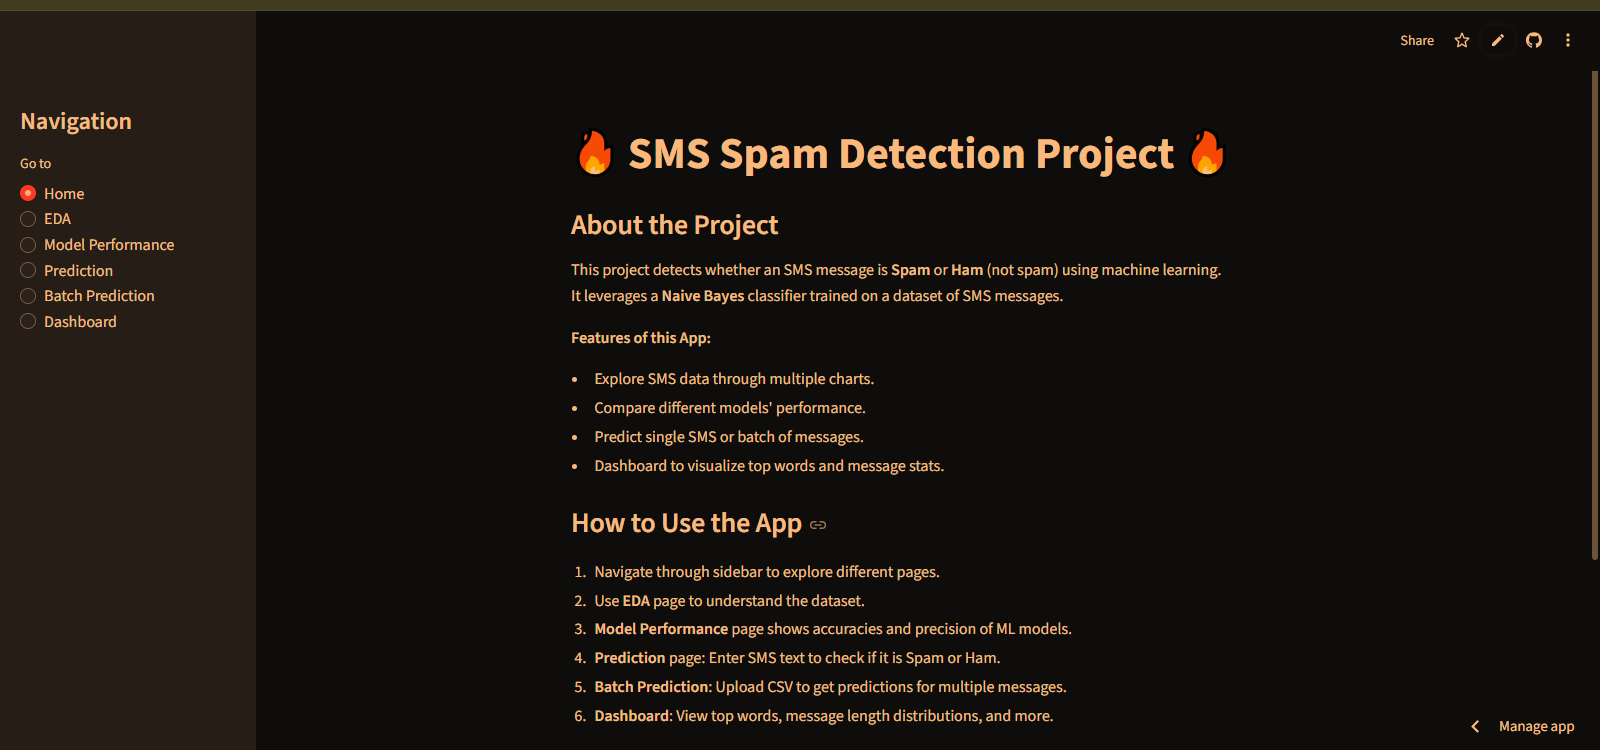

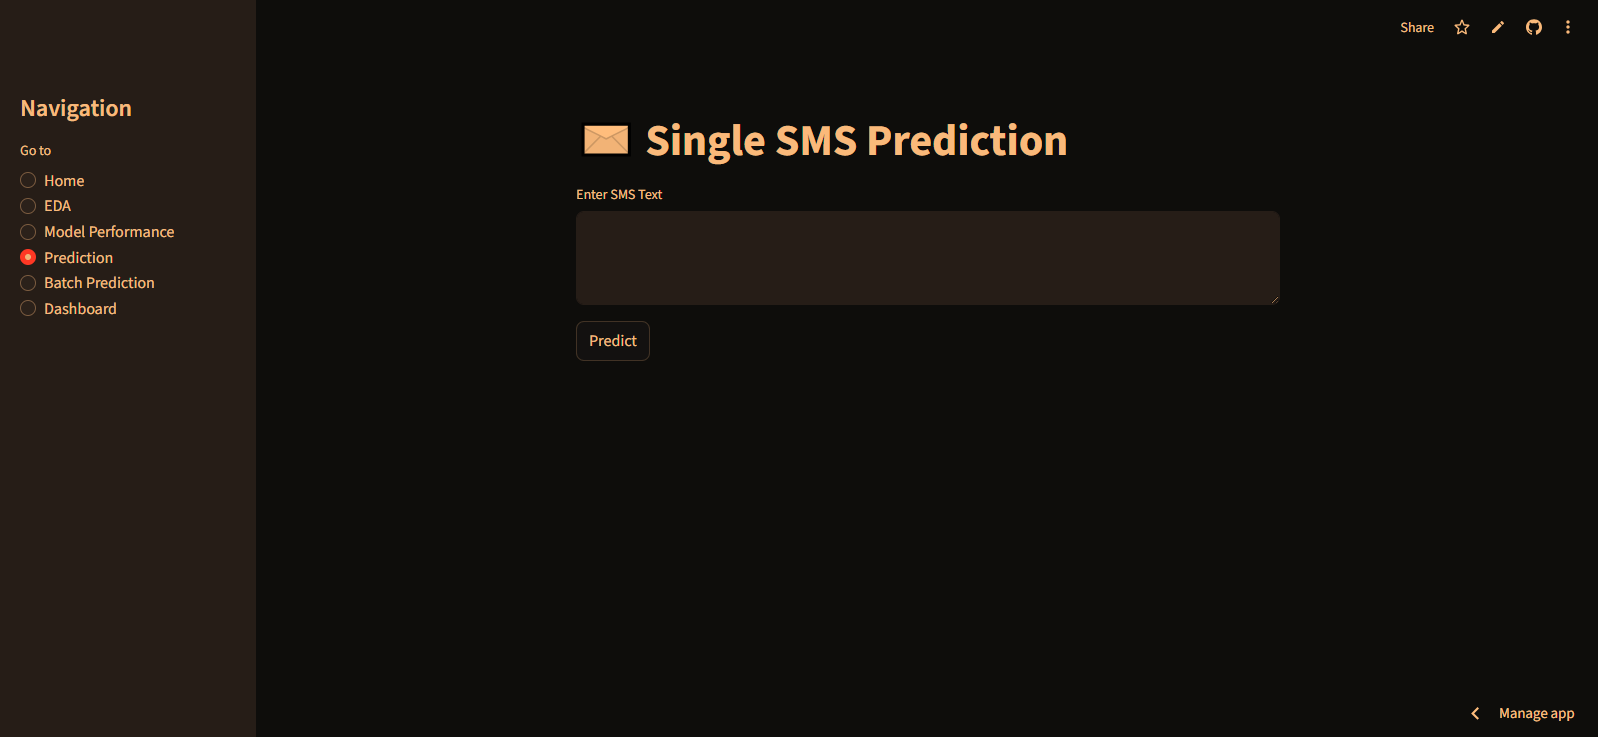